# Assignment 3 - Titanic Data Set

This notebook contains the exploratory data analysis conducted on the Titanic Data Set and the answer for the following three hypotheses:

* Determine if the survival rate is associated to the gender
* Determine the survival rate is associated to the age
* Determine the relationship among survival rate, age and gender
* Determine if the survival rate is associated to the class of passenger

### You can find this analysis in my [Github repo](https://github.com/valeriavelez/Titanic_EDA.git)

The analysis are divided in the following steps:

1. **Exploring the data and Univariate Analysis** - In this step we are exploring the Titanic Data. We are focusing on the survival feature as the dependent variable and the possible independent variables
2. **Cleaning the data** -  In this part, we are going to fix missing values or errors in the Titanic Data.
3. **Multivariate analysis** - The idea in this step is to understand the relationship between dependent and independent variables and to solve the three above hypotheses 

In [31]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set()

In [32]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Exploring the data and Univariate Analysis

Titanic data contains 891 observations or entries and 12 variables, some variables are described below:

* Survived: 0 = No, 1 = Yes
* Pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd) 
* SibSp: Number of Siblings/Spouses Aboard
* Parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


*Ref 1. “Titanic Disaster Dataset - Dataset by Nrippner” n.d. - “Titanic Disaster Dataset - Dataset by Nrippner.” n.d. Data.world. Accessed March 8, 2022. https://data.world/nrippner/titanic-disaster-dataset.*

In [33]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Survived variable

There are in total 549 people that did not survive in the Titanic, equivalent to 61.6% of the total and 342 people that survived (38.3%)

In [34]:
# Variable Survived
df_titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [35]:
df_titanic['Survived'].value_counts(normalize=True) * 100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

### Sex

There were more male than female in the Titanic, with a percentage of male of 64% (577 men) and female of 35.2% (314 women)

In [36]:
# Variable Sex
print('Number of female and male in the Titanic')
print(df_titanic['Sex'].value_counts())
print('\nPercentage of female and male in the Titanic')
print(df_titanic['Sex'].value_counts(normalize=True) * 100)

Number of female and male in the Titanic
male      577
female    314
Name: Sex, dtype: int64

Percentage of female and male in the Titanic
male      64.758698
female    35.241302
Name: Sex, dtype: float64


### Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

There were more people in 3rd class (491, equivalent to 55.1% of the total), following by 1st class (216, equivalent to 24.2% of the total) and 2nd class (184, equivalent to 20.6% of the total)

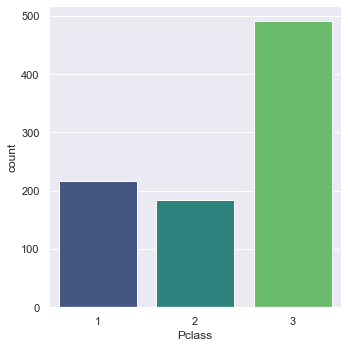

In [37]:
# Variable Pclass
sns.catplot(x="Pclass", kind="count", palette="viridis", data=df_titanic)

In [38]:
print(df_titanic['Pclass'].value_counts(normalize=True) * 100)
print(df_titanic['Pclass'].value_counts())

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64
3    491
1    216
2    184
Name: Pclass, dtype: int64


### Age

The histogram shows that the passenger's age are concentrated mainly between 20 and 40 years. The summary statistics depicts that the average age was 29.7 and 50% of the passenger were 28 or less years old.

<AxesSubplot:xlabel='Age', ylabel='Count'>

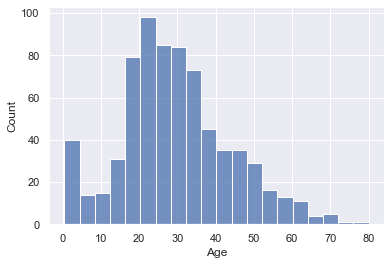

In [42]:
sns.histplot(data=df_titanic, x='Age')

In [43]:
df_titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Embarked variable - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

The histogram shows that most passengers embarked from Southampton Port, with a total of 644 people equivalent to 72.4% of the total passengers, following by Cherbourg (168 people, 18.9%) and Queenstown (77 people, 8.7%).

<AxesSubplot:xlabel='count', ylabel='Embarked'>

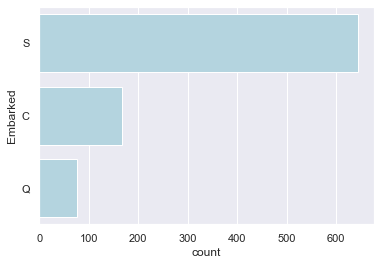

In [44]:
sns.countplot(y="Embarked", data=df_titanic, color="lightblue")

In [45]:
print(df_titanic['Embarked'].value_counts(normalize=True) * 100)
print(df_titanic['Embarked'].value_counts())

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


### 2. Cleaning the data 

It was found only missing data or errors in the variables Cabin, Age and Embarked. The following actions were performed to fix this values:

* **Age:** There were found 177 records with null values, which were replace for the mean of the age of all passengers
* **Embarked:** There were found only 2 null values, that were drop from the data set
* **Cabin:** This variable contains 687 records with null values, since it is not going to be use for our analysis, this column has been drop.

*It was created a new Data Set with the fixing data called titanic_fix*

In [46]:
#missing data
total = df_titanic.isnull().sum().sort_values(ascending=False)
percent = (df_titanic.isnull().sum()/df_titanic.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(50)

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [47]:
# Creating new data set to performe the changes in the data
titanic_fix = df_titanic.copy()

### Age

In [48]:
# Getting the average age for each PClass
df_titanic['Age'].mean()

29.69911764705882

In [49]:
titanic_fix['Age'].fillna(29.7, inplace=True)
titanic_fix.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Embarked

In [50]:
titanic_fix2 = titanic_fix[titanic_fix['Embarked'].notna()] 
titanic_fix2.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### Cabin

In [51]:
titanic_fix2.drop("Cabin", axis=1, inplace=True)
titanic_fix2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [52]:
titanic_fix2.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## 3. Multivariate analysis

This analysis pretend to answer the following hypotheses:

* Determine if the survival rate is associated to the gender
* Determine the survival rate is associated to the age
* Determine the relationship among survival rate, age and gender
* Determine if the survival rate is associated to the Passenger Class

### Survival and gender

The bar graph shows a relationship between the gender and the survival rate. If the gender was male was very likely to not survive in the Titanic and if the gender was female was more likely to survive to the accident.

The P-Value of the Chi-Square test is < .05 meaning that the variables are not independent to each other.

In [53]:
#Creating a new DataFrame to manipulate the titanic data
df_titanic2 = titanic_fix2.copy()
# Changing Survived variable
df_titanic2["Survived"] = np.where(df_titanic2["Survived"] == 0, "No", df_titanic2["Survived"])
df_titanic2["Survived"] = np.where(df_titanic2["Survived"] == '1', "Yes", df_titanic2["Survived"])
df_titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [54]:
survive_gender = df_titanic2.groupby(['Survived','Sex'])
survive_gender.size()

Survived  Sex   
No        female     81
          male      468
Yes       female    231
          male      109
dtype: int64

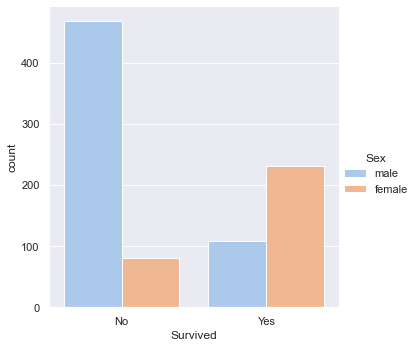

In [55]:
sns.catplot(x="Survived", hue="Sex", kind="count",
            palette="pastel", data=df_titanic2)

In [56]:
# Chi-Square Test
Crosstabres=pd.crosstab(index=df_titanic2['Sex'],columns=df_titanic2['Survived'])
print(Crosstabres)

Survived   No  Yes
Sex               
female     81  231
male      468  109


In [57]:
ChiSqResult = chi2_contingency(Crosstabres)
print('P-Value for the Chi-Square test is: ',ChiSqResult[1])

P-Value for the Chi-Square test is:  3.7799096665576e-58


### Age and Survival

There is a relationship between the age and the probability of survive. It was found that childen were more likely to survive than male, that could been seen in the two-way table.

In [58]:
#Creating a new column for age to manipulate the titanic data
conditions = [
    (df_titanic2["Age"] <= 14),
    (df_titanic2["Age"] > 14)
    ]
values = ['Child', 'Adult']
df_titanic2['Age2'] = np.select(conditions, values)
df_titanic2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age2
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Adult
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


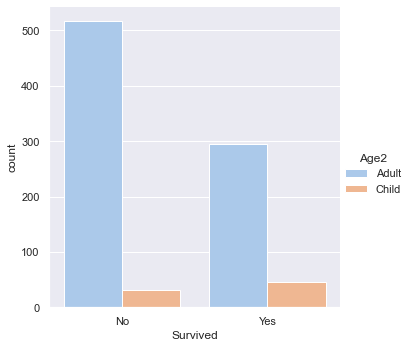

In [59]:
sns.catplot(x="Survived", hue="Age2", kind="count",
            palette="pastel", data=df_titanic2)

In [60]:
pd.crosstab(index=df_titanic2['Age2'],columns=df_titanic2['Survived']).apply(lambda r: r/r.sum(), axis=1)

Survived,No,Yes
Age2,,
Adult,0.636700,0.363300
Child,0.415584,0.584416


<AxesSubplot:xlabel='Age', ylabel='Survived'>

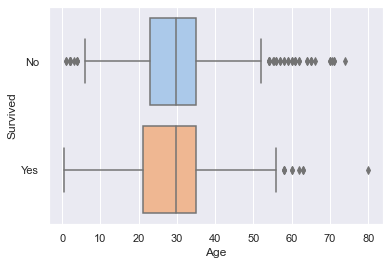

In [61]:
sns.boxplot(x="Age", y="Survived", palette="pastel", data=df_titanic2)

### Age, Survival and Gender

[Text(0.5, 1.0, 'Female')]

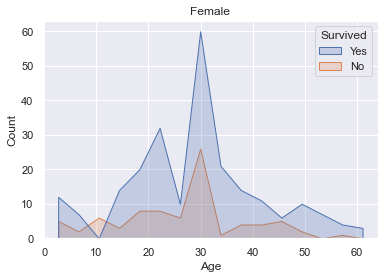

In [62]:
sns.histplot(data=df_titanic2[df_titanic2['Sex']=='female'], x="Age", hue="Survived", element="poly").set(title='Female')

[Text(0.5, 1.0, 'Female')]

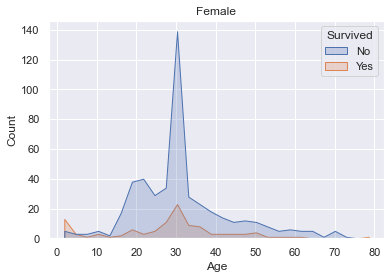

In [63]:
sns.histplot(data=df_titanic2[df_titanic2['Sex']=='male'], x="Age", hue="Survived", element="poly").set(title='Female')

### Passenger Class and Survival

There is a correlation between the variables Passenger Class and Survived, according to the Chi-Square analysis, obtaining a p-value less than .05. 

It was more likely to survived to the Titanic if the passenger was in Class 1 than in Class 3 or 2, and it was more likely to survive in Class 2 than in Class 3.

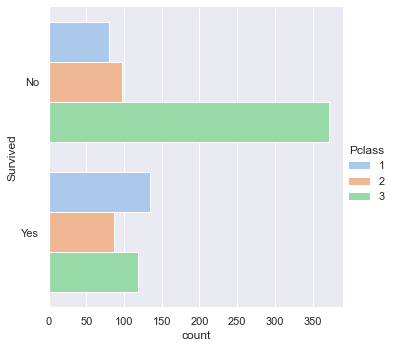

In [64]:
sns.catplot(y="Survived", hue="Pclass", kind="count", palette="pastel", data=df_titanic2)

In [307]:
pd.crosstab(index=df_titanic2['Pclass'],columns=df_titanic2['Survived']).apply(lambda r: r/r.sum(), axis=1)

Survived,No,Yes
Pclass,,
1,0.373832,0.626168
2,0.527174,0.472826
3,0.757637,0.242363


In [308]:
# Chi-Square Test
Crosstabclass=pd.crosstab(index=df_titanic2['Pclass'],columns=df_titanic2['Survived'])
ChiSqResult = chi2_contingency(Crosstabclass)
print('P-Value for the Chi-Square test is: ',ChiSqResult[1])

P-Value for the Chi-Square test is:  1.1813624785477922e-22
